# 이미지 인식 - CNN
## MNIST 사례

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint, EarlyStopping

import os
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
# seed 값 설정
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

In [3]:
# 데이터 불러오기
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') /225.0
Y_train = keras.utils.to_categorical(Y_train)
Y_test = keras.utils.to_categorical(Y_test)

In [4]:
# 컨볼류션 신경망 설정
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=2),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              

In [5]:
model.compile(loss = 'categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

In [6]:
# 모델 최적화 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

In [7]:
modelpath = MODEL_DIR + "mnist-cnn-{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath = modelpath, monitor = 'val_loss',
                              verbose = 1, save_best_only = True)
early_stopping_callback = EarlyStopping(monitor = 'val_loss',
                                       patience = 10)

In [9]:
# 모델의 실행
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30,
                    batch_size=200, #epochs=5, verbose=2, 
                    callbacks=[early_stopping_callback, checkpointer])

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 43s 718us/step - loss: 0.2852 - accuracy: 0.9117 - val_loss: 0.0529 - val_accuracy: 0.9826

Epoch 00001: val_loss improved from inf to 0.05291, saving model to ./model/mnist-cnn-01-0.0529.hdf5
Epoch 2/30
60000/60000 [==============================] - 43s 719us/step - loss: 0.0891 - accuracy: 0.9737 - val_loss: 0.0415 - val_accuracy: 0.9864

Epoch 00002: val_loss improved from 0.05291 to 0.04147, saving model to ./model/mnist-cnn-02-0.0415.hdf5
Epoch 3/30
60000/60000 [==============================] - 43s 718us/step - loss: 0.0687 - accuracy: 0.9789 - val_loss: 0.0358 - val_accuracy: 0.9880

Epoch 00003: val_loss improved from 0.04147 to 0.03583, saving model to ./model/mnist-cnn-03-0.0358.hdf5
Epoch 4/30
60000/60000 [==============================] - 43s 718us/step - loss: 0.0542 - accuracy: 0.9835 - val_loss: 0.0378 - val_accuracy: 0.9885

Epoch 00004: val_loss did not improve f

In [10]:
from tensorflow.keras.models import load_model
del model
model = load_model('model/mnist-cnn-12-0.0302.hdf5')

In [11]:
# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test, verbose = 0)[1]))


 Test Accuracy: 0.9920


In [12]:
# 테스트셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

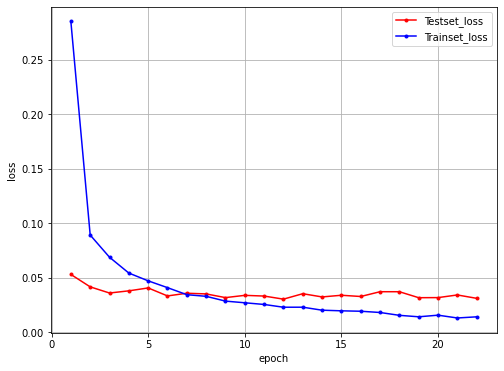

In [13]:
# 그래프로 표현
x_len = np.arange(1,len(y_vloss)+1)
plt.figure(figsize = (8,6))
plt.plot(x_len, y_vloss, marker = '.', c = "red", label ='Testset_loss')
plt.plot(x_len, y_loss, marker = '.', c='blue', label = 'Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc = 'upper right')
# plt.axis([0, 20, 0, 0.35])
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

### 결론 : best model은 epoch 12, 정확도는 99.20%